# 2.2 数据预处理
将数据读写到文件<==>与tensor的相互转换

In [2]:
import os

os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [3]:
import pandas as pd
data = pd.read_csv("data/house_tiny.csv")
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


如上我们创建了一个csv逗号分隔文件，存放了4条记录，每条记录保存了一个房子的房间数量、小巷（Alley），我们使用了pandas.DataFrame这一数据结构保存了这些表格数据。另外，这些数据有些值为NaN，表示数据缺失

## 缺失值处理
通常使用均值，例如NumRooms项，又比如Alley只有两种值，推测表示有无小巷，于是转化为Alley_Pave项，用1表示(pave-有)和0表示(没有)。另外我们把它分割为输入和输出

In [5]:
inputs, output = data.iloc[:, 0:2], data.iloc[:, 2]
# inputs的NumRooms均值填充
inputs = inputs.fillna(inputs.mean())
# 使用get_ummies函数
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

C:\Users\mrrai\AppData\Local\Temp\ipykernel_26636\3508628120.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  inputs = inputs.fillna(inputs.mean())


,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


转为tensor

In [7]:
import torch
X, y = torch.tensor(inputs.values), torch.tensor(output.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

# 2.3 一些基本的线性代数
## 2.3.1 标量
标量由只有一个元素的张量表示

In [8]:
x = torch.tensor(2.0)
y = torch.tensor(3.0)
x, y, x+y, x*y

(tensor(2.), tensor(3.), tensor(5.), tensor(6.))

## 2.3.2向量
向量表示数据集中的样本时，它们的值具有一定的现实意义。 例如，如果我们正在训练一个模型来预测贷款违约风险，我们可能会将每个申请人与一个向量相关联， 其分量与其收入、工作年限、过往违约次数和其他因素相对应。在数学表示法中，我们通常将**向量记为粗体、小写的符号**，我们**通过一维张量处理向量**。大量文献认为**列向量是向量的默认方向**，在本书中也是如此

In [10]:
x = torch.arange(6)
x, x[3]

(tensor([0, 1, 2, 3, 4, 5]), tensor(3))

向量的长度通常称为**向量的维度（dimension）**，这可以通过len(), shape, size()等得到.请注意，维度（dimension）这个词在不同上下文时往往会有不同的含义，这经常会使人感到困惑。 为了清楚起见，我们在此明确一下： 向量或轴的维度被用来表示向量或轴的长度，即向量或轴的元素数量。 然而，张量的维度用来表示张量具有的轴数。 在这个意义上，张量的某个轴的维数就是这个轴的长度。

In [11]:
len(x), x.size(), x.shape

(6, torch.Size([6]), torch.Size([6]))


## 2.3.3矩阵
**矩阵，我们通常用粗体、大写字母来表示，在代码中表示为具有两个轴的张量**。当我们交换矩阵的行和列时，结果称为矩阵的转置（transpose）。作为方阵的一种特殊类型，对称矩阵（symmetric matrix）等于其转置。此外，尽管单个向量的默认方向是列向量，但在表示表格数据集的矩阵中， 将每个数据样本作为矩阵中的行向量更为常见。

In [15]:
X = torch.arange(6).reshape(2, 3)
X, X.T

(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([[0, 3],
         [1, 4],
         [2, 5]]))

## 2.3.4 降维--sum
默认情况下，调用求和函数sum会沿所有的轴降低张量的维度，使它变为一个标量。 我们还可以指定张量沿哪一个轴来通过求和降低维度。 以矩阵为例，为了通过求和所有行的元素来降维（轴0），我们可以在调用函数时指定axis=0。 由于输入矩阵沿0轴降维以生成输出向量，因此输入轴0的维数在输出形状中消失。

In [18]:
X, X.sum()

(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor(15))

In [20]:
X_sum_dim0 = X.sum(axis=0)
X_sum_dim0, X_sum_dim0.shape

(tensor([3, 5, 7]), torch.Size([3]))

In [21]:
X_sum_dim1 = X.sum(axis=1)
X_sum_dim1, X_sum_dim1.shape

(tensor([ 3, 12]), torch.Size([2]))

mean() = sum()/numel() 均值

In [24]:
X = torch.tensor([1.0, 2, 3, 4, 5, 6]).reshape(2, 3)
X, X.mean(), X.sum(axis=[0, 1])/X.numel()

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 tensor(3.5000),
 tensor(3.5000))

In [25]:
X.mean(axis=0)

tensor([2.5000, 3.5000, 4.5000])

非降维求和，求和后仍保持两个维度

In [26]:
X_sum_dim0 = X.sum(axis=0, keepdims=True)
X_sum_dim0

tensor([[5., 7., 9.]])

通过广播机制将求和sum作用于原矩阵

In [27]:
X/X_sum_dim0

tensor([[0.2000, 0.2857, 0.3333],
        [0.8000, 0.7143, 0.6667]])

按照相应维度逐个累加

In [28]:
X, X.cumsum(axis=0), X.cumsum(axis=1)

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 tensor([[1., 2., 3.],
         [5., 7., 9.]]),
 tensor([[ 1.,  3.,  6.],
         [ 4.,  9., 15.]]))

## 向量点乘
$torch.sum(x*y) or torch.dot(x, y)$

In [31]:
x = torch.arange(4, dtype=torch.float32)
y = torch.tensor([2.0, 4.0, 3.0, 5.0])
x, y, x*y, torch.sum(x*y), torch.dot(x, y)

(tensor([0., 1., 2., 3.]),
 tensor([2., 4., 3., 5.]),
 tensor([ 0.,  4.,  6., 15.]),
 tensor(25.),
 tensor(25.))

## 矩阵-向量积
$Ax=b$

In [34]:
A = torch.tensor([1.0, 2, 3, 4, 5, 6]).reshape(2, 3)
x = torch.tensor([2.0, 1, 3])
b = torch.mv(A, x)
A, x, b

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 tensor([2., 1., 3.]),
 tensor([13., 31.]))

## 矩阵乘法
AB = C

In [35]:
A = torch.tensor([1.0, 2, 3, 4, 5, 6]).reshape(2, 3)
B = torch.tensor([1.0, 2, 3, 4, 5, 6]).reshape(3, 2)
A, B, torch.mm(A, B)

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 tensor([[1., 2.],
         [3., 4.],
         [5., 6.]]),
 tensor([[22., 28.],
         [49., 64.]]))

## 向量范数与矩阵范数
一般提到的是2-范数，平方和再开方

In [36]:
b, torch.norm(b)

(tensor([13., 31.]), tensor(33.6155))

In [37]:
A, torch.norm(A)

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 tensor(9.5394))

In [39]:
# 1-范数，绝对值之和
b.abs().sum()

tensor(44.)

In [40]:
# 无穷范数，绝对值最大值
b.abs().max()

tensor(31.)

## 作业
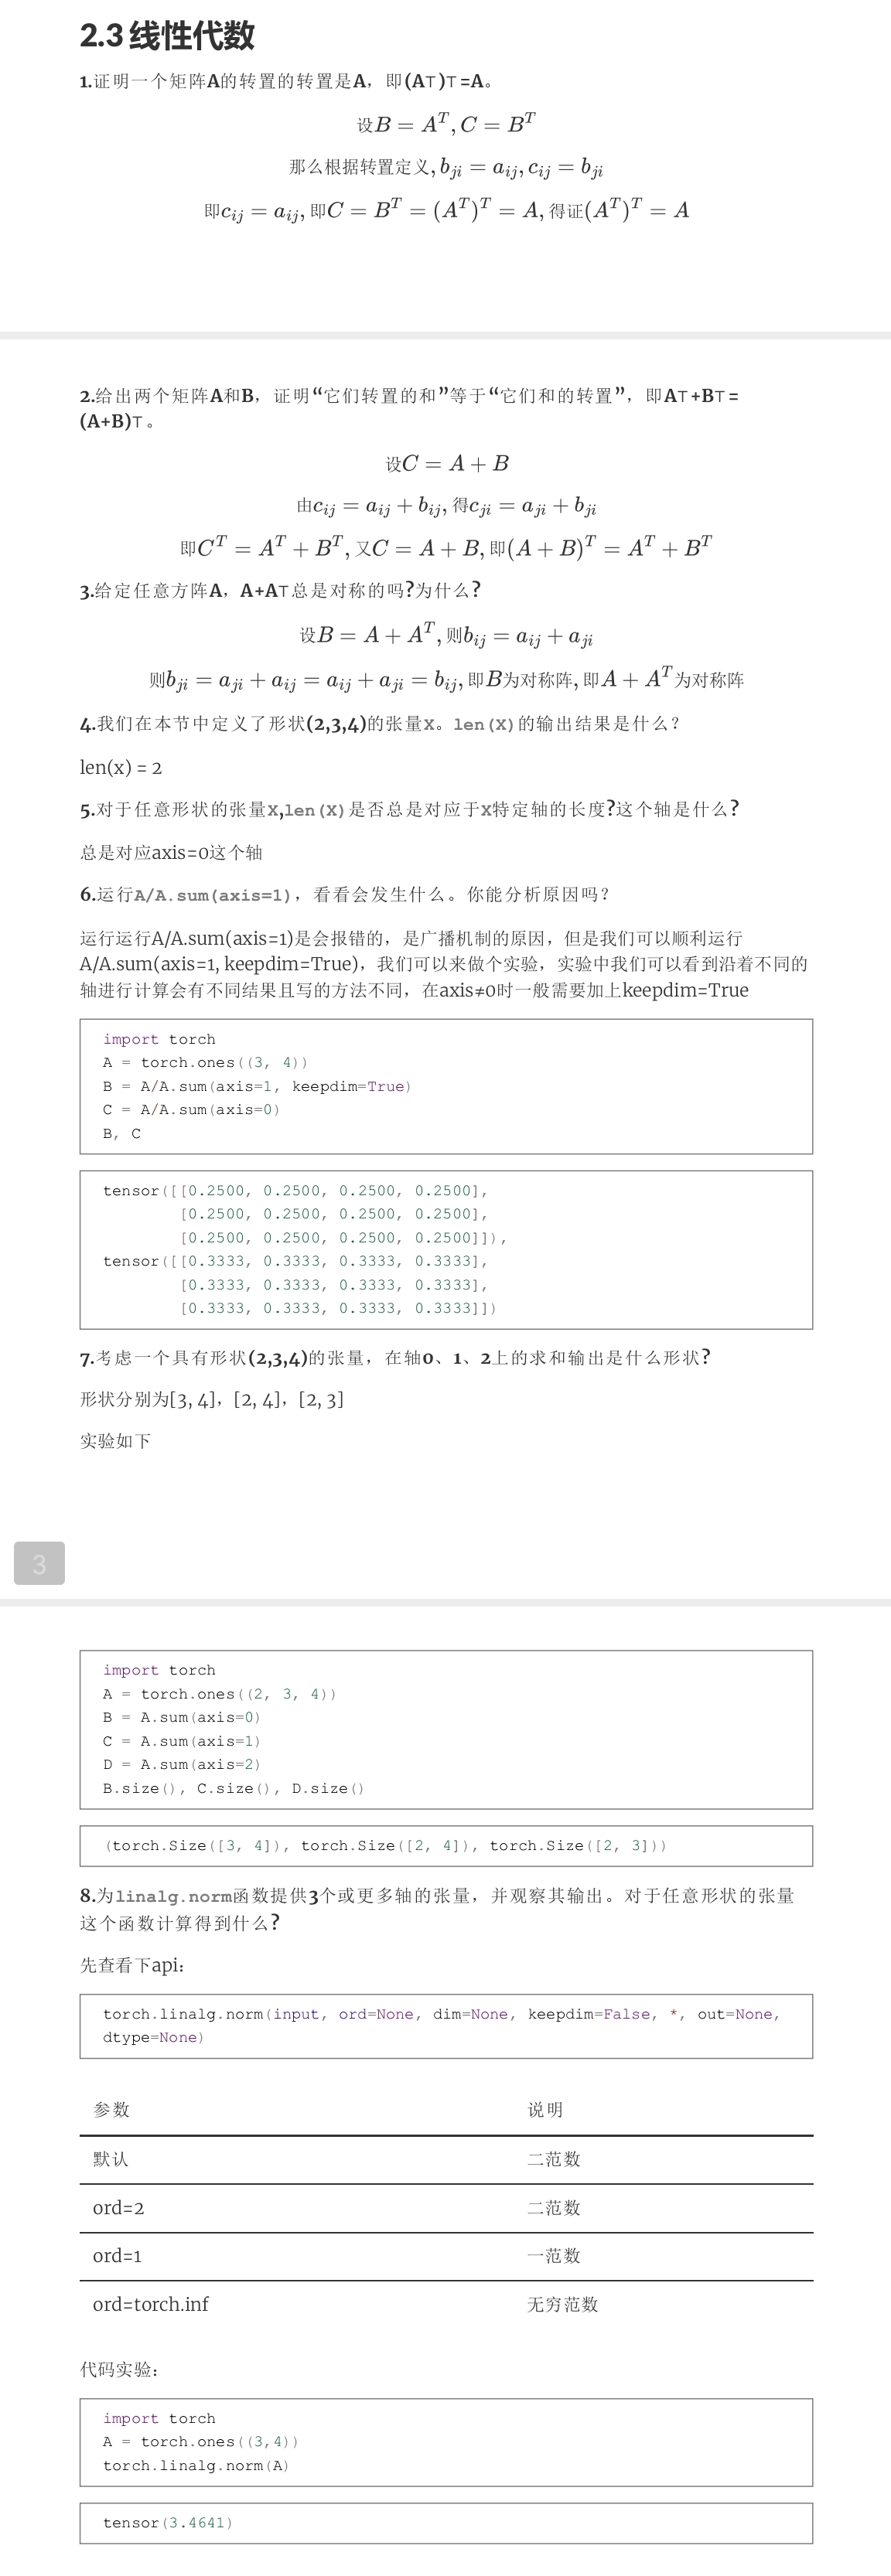

### 关于作业第6题广播机制的说明
关于第6题
运⾏A/A.sum(axis=1)，看看会发⽣什么。你能分析原因吗？

从语意上，这是想对矩阵A做归一化使得每行的和为1，但会报错
A.shape: (5,4)
A.sum(axis=1).shape: (5)
shape为(5,4)和(5)的tensor之间对广播来说是不合法的，因此报错

解决办法: A/A.sum(axis=1, keepdims=True), 在(5,4)和(5,1)之间是可以广播的

顺便一提, 如果是A/A.sum(axis=0), 则无需keepdims=True也可以正常广播
即在(5,4)和(4)间也是可以广播的，不需要一定是(5,4)和(1,4)
这可以理解为一个向量总是默认将其作为行向量，当尝试广播，对齐操作对象间的shape时，默认会做右对齐，因此(5,4)和(5)进行右对齐后发现维数不匹配，广播失败，而(5,4)和(4)之间可以广播